In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib
import matplotlib.pyplot as plt
import pyaudio
import wave
import time
import sys
import heapq

from scripts.ioaudio import sigToWav

from scripts.graph import qp

from IPython.core.display import display, HTML
import pandas as pd
from scripts.fftgraph import getfft, xfft, detectNMaxFreq,low_pass_index
#display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
[396.76/2*n for n in range(1,10)]

[198.38,
 396.76,
 595.14,
 793.52,
 991.9,
 1190.28,
 1388.6599999999999,
 1587.04,
 1785.42]

<IPython.core.display.Javascript object>


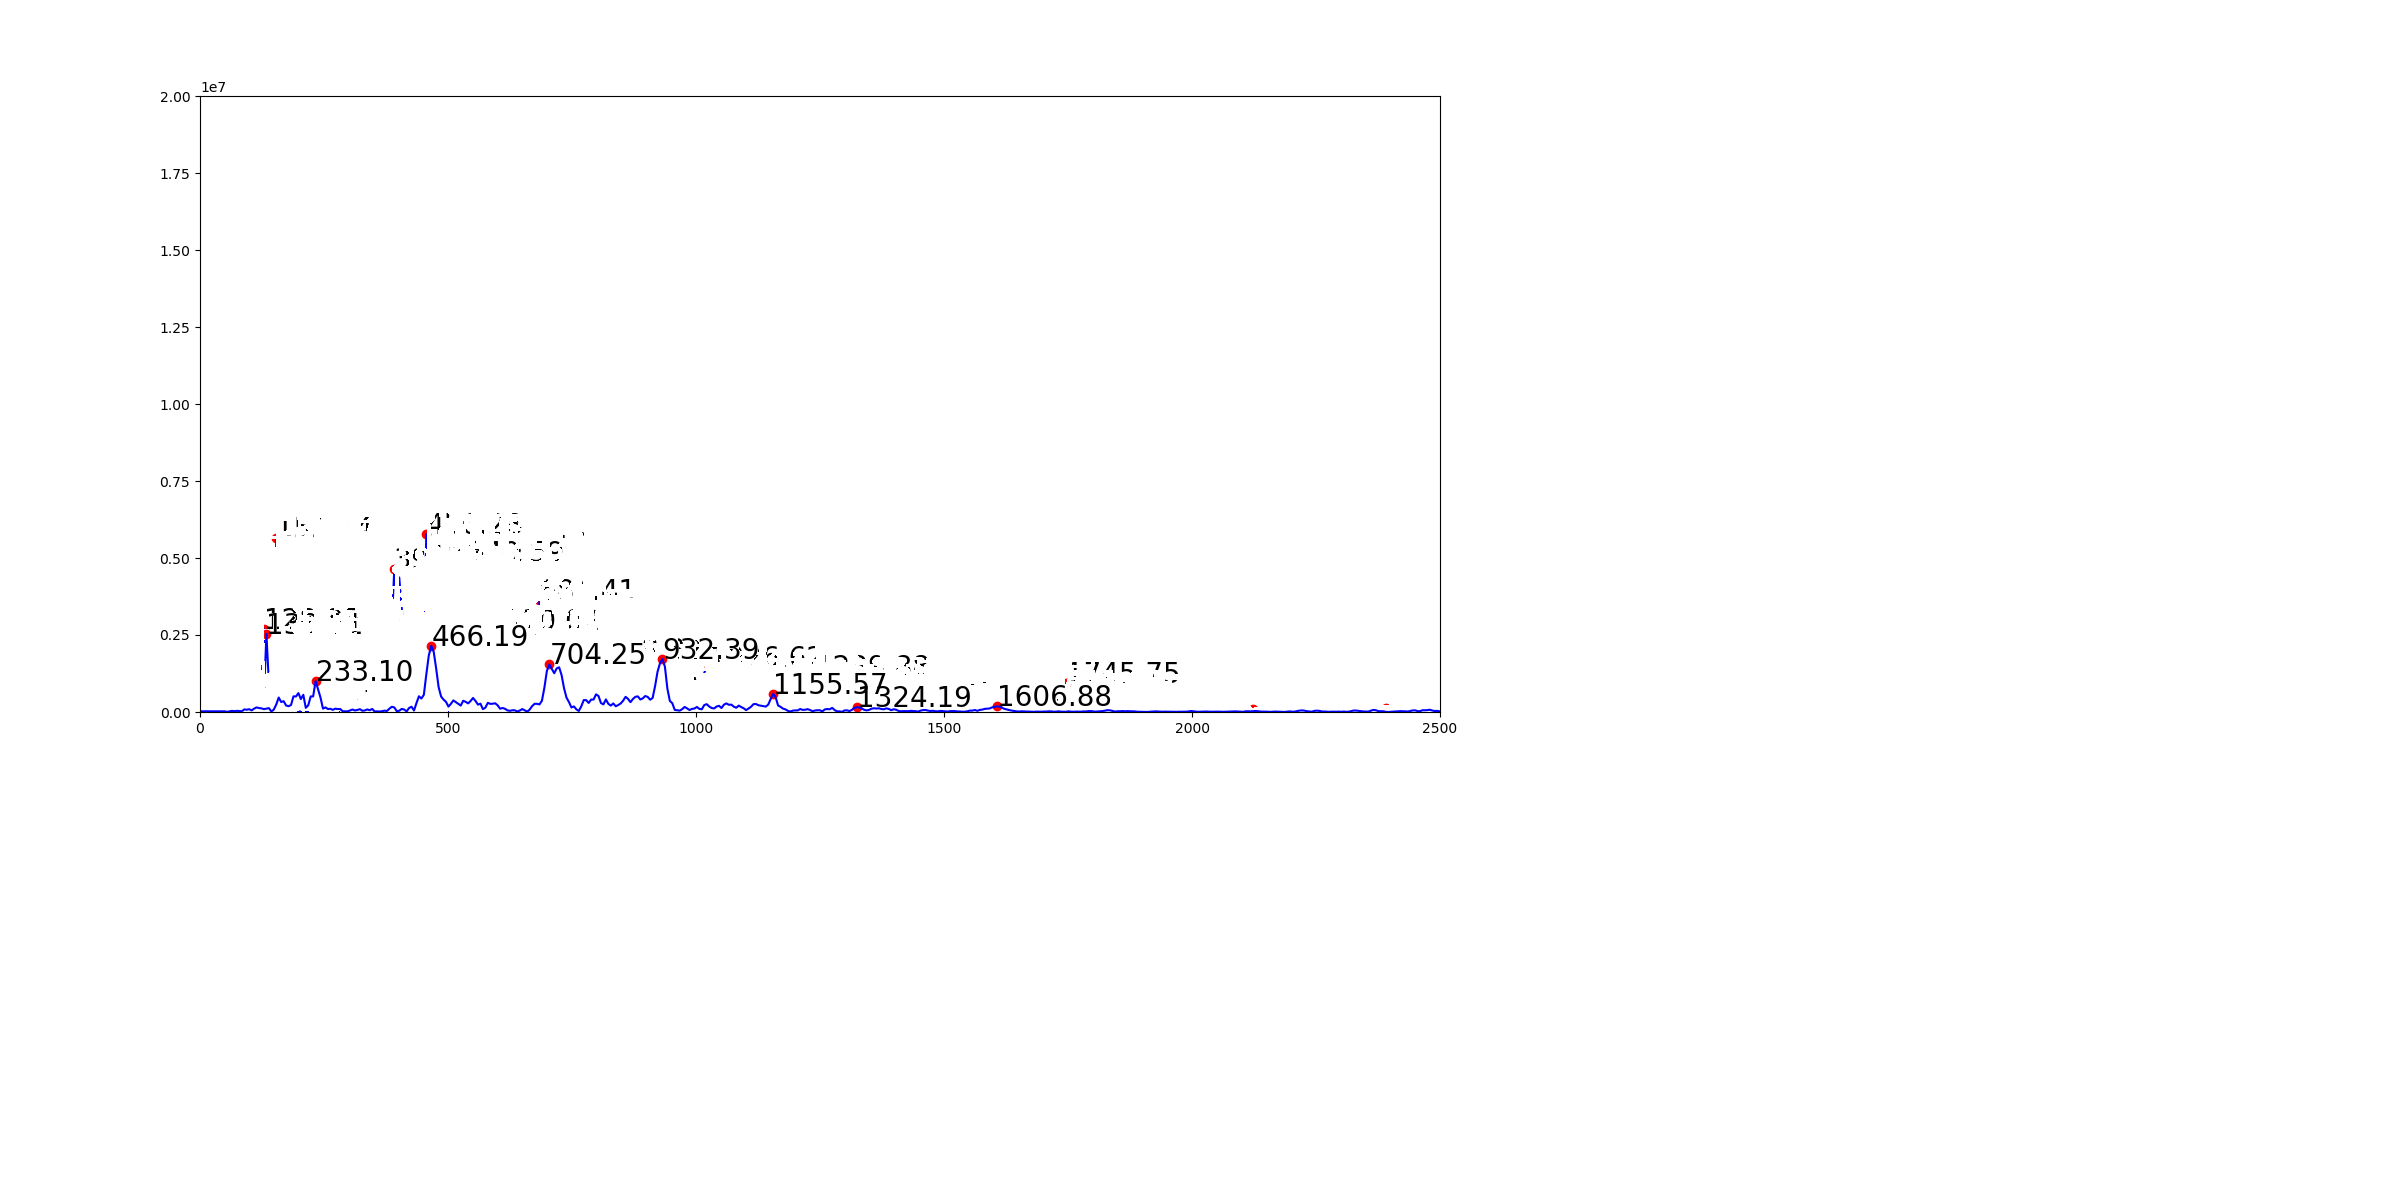

In [ ]:
%matplotlib notebook
class Data:
    data=0
    fig,ax = plt.subplots(1,1,figsize=(16, 8))
    first=True

def drawfft(x,y,xm,ym):
    colors=['b','r']
    textref=list()
    if not Data.first:
        
        Data.ax.lines[0].set_ydata(y)
        if not xm==[]:
            off=[[i,j] for i,j in zip(xm,ym)]
            Data.ax.collections[0]._offsets=ma.masked_array(off,mask=False,fill_value=1000000000)
            for x,y in zip(xm,ym):
                textref.append(Data.ax.text(x,y, "{:.2f}".format(x), fontsize=20))
    else:
        Data.ax.plot(x, y, colors[0])
        Data.ax.scatter([0], [0], c=colors[1],marker="o")
        Data.first=False
    
    Data.ax.set_ylim(0,20000000)
    Data.ax.set_xlim(0,2500)
    
    Data.fig.canvas.draw()
    
    [r.remove() for r in textref]
    
    
def callback(in_data, frame_count, time_info, status):
    buf=np.frombuffer(in_data, np.int16)
    fft=getfft(buf)
    #I decide to keep only freq under 3000 (LIM)
    xfr=low_pass_index(fft,LIM)
    
    fft=fft[0:len(xfr)]
    
    xm,ym=detectNMaxFreq(fft)
    #keep only 8 highest peek for display
    if len(xm)>=8:
        im=heapq.nlargest(6,range(len(ym)),ym.__getitem__)
    
        xm=[xm[i] for i in im]
        ym=[ym[i] for i in im]
        
    xm= [xfr[xi] for xi in xm]
    drawfft(xfr,fft,xm,ym)
    return (in_data, pyaudio.paContinue)

FORMAT = pyaudio.paInt16
CHANNELS = 1
RATE = 44100
CHUNK = 8892
LIM=3000

# instantiate PyAudio (1)
p = pyaudio.PyAudio()

# define callback (2)
#frame count just gives frames per buffer
#time info gives nothing interestingː
#{'input_buffer_adc_time': 0.0,
# 'current_time': 0.0,
# 'output_buffer_dac_time': 0.0}
#status gives 0
frames = []


# open stream using callback (3)
stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK,
                stream_callback=callback)

# start the stream (4)
stream.start_stream()

# wait for stream to finish (5)
#while stream.is_active():
#    time.sleep(0.1)
time.sleep(500)
# stop stream (6)
stream.stop_stream()
stream.close()

# close PyAudio (7)
p.terminate()

sigToWav(frames,stream,"low.wav")

In [ ]:
Data.ax.plot([0],[0])

In [ ]:
Data.ax.collections[1]

In [ ]:
Data.ax.collections[1].get_offsets()

In [ ]:
xfr
y = np.random.random((len(xfr),))
off=[[i,j] for i,j in zip(xfr,y)]

In [ ]:

ma.masked_array(off,mask=False,fill_value=1000000000)

In [ ]:

Data.ax.collections[1]._offsets=ma.masked_array(off,mask=False,fill_value=1000000000)
#["data"]=[[i,j] for i,j in zip(xfr,y)]


In [ ]:
s.properties()

In [ ]:
a=[5,98,56,41,2,6,42,15]
heapq.nlargest(3,range(len(a)),a.__getitem__)

In [ ]:
fft